In [1]:
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cftime
import dask
import xarrayutils
import cartopy.crs as ccrs
from xmip.preprocessing import combined_preprocessing
from xmip.preprocessing import replace_x_y_nominal_lat_lon
from xmip.drift_removal import replace_time
from xmip.postprocessing import concat_experiments
import xmip.drift_removal as xm_dr
import xmip as xm
import xesmf as xe
import datetime
from dateutil.relativedelta import relativedelta
import utils
import cf_xarray as cfxr

from sklearn.linear_model import LinearRegression
import scipy.signal as signal
from scipy import stats

In [2]:
dask.config.set(**{'array.slicing.split_large_chunks': True})

In [3]:
model_run_pulse_dict = utils.model_run_pulse_dict
model_run_1pct_dict = utils.model_run_1pct_dict
model_run_control_dict = utils.model_run_picontrol_dict
model_run_cdr_pulse_dict = utils.model_run_cdr_pulse_dict


In [4]:
#define our output grid size

ds_out = xr.Dataset(
    {
        "lat": (["lat"], np.arange(-89.5, 90.5, 1.0)),
        "lon": (["lon"], np.arange(0, 360, 1)),
        "lat_b": (["lat_b"], np.arange(-90.,91.,1.0)),
        "lon_b":(["lon_b"], np.arange(.5, 361.5, 1.0))
    }
)

In [5]:
A = utils.find_area(ds_out)

In [ ]:
tas_co2_1pct = {}
tas_co2_pictrl = {}

for m in model_run_1pct_dict.keys():
    print(m)
    print('tas')
    tas_co2_1pct[m] = xr.open_mfdataset(f'cmip6_data/tas_Amon_{model_run_1pct_dict[m]}',  use_cftime=True) #kg/m2/s
    lat_corners = cfxr.bounds_to_vertices(tas_co2_1pct[m].isel(time = 0)['lat_bnds'], "bnds", order=None)
    lon_corners = cfxr.bounds_to_vertices(tas_co2_1pct[m].isel(time = 0)['lon_bnds'], "bnds", order=None)
    tas_co2_1pct[m] = tas_co2_1pct[m].assign(lon_b=lon_corners, lat_b=lat_corners)
    tas_co2_1pct[m] = utils._regrid_ds(tas_co2_1pct[m], ds_out)
for m in model_run_control_dict.keys():
    print(m)
    print('tas')
    tas_co2_pictrl[m] = xr.open_mfdataset(f'cmip6_data/tas_Amon_{model_run_control_dict[m]}',  use_cftime=True) #kg/m2/s
    lat_corners = cfxr.bounds_to_vertices(tas_co2_pictrl[m].isel(time = 0)['lat_bnds'], "bnds", order=None)
    lon_corners = cfxr.bounds_to_vertices(tas_co2_pictrl[m].isel(time = 0)['lon_bnds'], "bnds", order=None)
    tas_co2_pictrl[m] = tas_co2_pictrl[m].assign(lon_b=lon_corners, lat_b=lat_corners)
    tas_co2_pictrl[m] = utils._regrid_ds(tas_co2_pictrl[m], ds_out)

for m in ['NORESM2']:
    tas_co2_1pct[m]['time'] = tas_co2_pictrl[m]['time'][:len(tas_co2_1pct[m]['time'])]
    
for m in ['CANESM5_r1p2', 'CANESM5_r2p2', 'CANESM5_r3p2']:
    tas_co2_1pct[m]['time'] = tas_co2_pictrl['CANESM5_r1p2']['time'][:len(tas_co2_1pct[m]['time'])]
    
for m in ['CANESM5_r1p1', 'CANESM5_r2p1', 'CANESM5_r3p1']:
    tas_co2_1pct[m]['time'] = tas_co2_pictrl['CANESM5_r1p1']['time'][:len(tas_co2_1pct[m]['time'])]   
    
for m in ['UKESM1_r1', 'UKESM1_r2', 'UKESM1_r3', 'UKESM1_r4']:
    tas_co2_1pct[m]['time'] = tas_co2_pictrl['UKESM1_r1']['time'][:len(tas_co2_1pct[m]['time'])]
    

    #for m in model_run_control_dict.keys():
#     tas_co2_1pct[m] = utils._regrid_ds(tas_co2_1pct[m], ds_out)
#     tas_co2_pictrl[m] = utils._regrid_ds(tas_co2_pictrl[m], ds_out)

UKESM1_r1
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


UKESM1_r2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


UKESM1_r3
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


UKESM1_r4
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


MIROC
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


NORESM2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


ACCESS
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


GFDL
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r1p2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r2p2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r3p2
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r1p1
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r2p1
tas


/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


CANESM5_r3p1
tas


### Notes:

GFDL: 1pct and esm pi-control start from year 0001

UKESM1: 1pct starts in 1850 and pi-control starts in 1960, move 1pct to start in 1960

MIROC: both start from 1850

NORESM2: 1pct from 0001 pi-control from 1600-- move 1pct to 1600

ACCESS: 1pct and pi-control from 0101

CANESM5_r1p2: 1pct 1850, pi-control 5550, move 1pct to 5550


In [ ]:
dif = {}
for m1 in model_run_1pct_dict.keys():
    print(m1)
    if m1 == 'UKESM1_r1' or m1 == 'UKESM1_r2' or m1 == 'UKESM1_r3' or m1 == 'UKESM1_r4':
        m2 = 'UKESM1_r1'
    elif m1 == 'CANESM5_r1p1' or m1 == 'CANESM5_r2p1' or m1 == 'CANESM5_r3p1':
         m2 = 'CANESM5_r1p1'
    elif m1 == 'CANESM5_r1p2' or m1 == 'CANESM5_r2p2' or m1 == 'CANESM5_r3p2':
         m2 = 'CANESM5_r1p2'
    else:
        m2 = m1
    print(m1, m2)
    
    dif[m1] = tas_co2_1pct[m1] - tas_co2_pictrl[m2]
    times = pd.date_range('2000', periods=len(dif[m1]['time']), freq='MS')
    weights = times.shift(1, 'MS') - times
    weights = xr.DataArray(weights, [('time', dif[m1]['time'].values)]).astype('float')
    dif[m1] =  (dif[m1] * weights).groupby('time.year').sum('time')/weights.groupby('time.year').sum('time')

    #dif[m1] = dif[m1].groupby('time.year').mean()
    dif[m1]['year'] = range(len(dif[m1]['year']))

In [ ]:
for m in dif.keys():
    dif[m] = dif[m].drop('height')

In [ ]:
ds_dif = xr.concat([dif[m] for m in dif.keys()], pd.Index([m for m in dif.keys()], name='model'), coords='minimal')


In [ ]:
ds_dif = ds_dif.rename({'year':'s'})

## TCR Check

Notes:
    
NORESM2:  1.48 K (at yrs 60-80 averaged) ##https://gmd.copernicus.org/preprints/gmd-2019-378/gmd-2019-378.pdf ## Seland et al 2020 The Norwegian Earth System Model, NorESM2 - Evaluation of the CMIP6 DECK and historical simulations
    
GFDL: TCR1pct of 2.05 K. ## https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2021GL095778 ## Dong et al 2021 Biased Estimates of Equilibrium Climate Sensitivity and Transient Climate Response Derived From Historical CMIP6 Simulations

UKESM1: 1.0 K to 2.6 K (at yrs 60-80 averaged) ##https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2019MS001739 ## Sellar et al 2019 UKESM1: Description and evaluation of the U.K. EarthSystem Mode

MIROC: 

ACCESS: For ACCESS-ESM1.5 the TCR is 1.958C (at yr 70) ##https://www.publish.csiro.au/es/pdf/ES19035 ## Ziehn et al 2020 The Australian Earth System Model: ACCESS-ESM1.5

CANESM5_r1p2: 2.8 K (at yrs 60-80 averaged) ## https://gmd.copernicus.org/articles/12/4823/2019/gmd-12-4823-2019.html ## Swart et al 2019 The Canadian Earth System Model version 5 (CanESM5.0.3)




## Jones and Friedlingston, 2020

ACCESSESM1. 2.00 

CanESM5  2.21 

MIROC-ES2L 1.32 

NOAA-GFDLESM4 1.44 

NorESM2-LM 1.34 

UKESM1-0-LL 2.38 

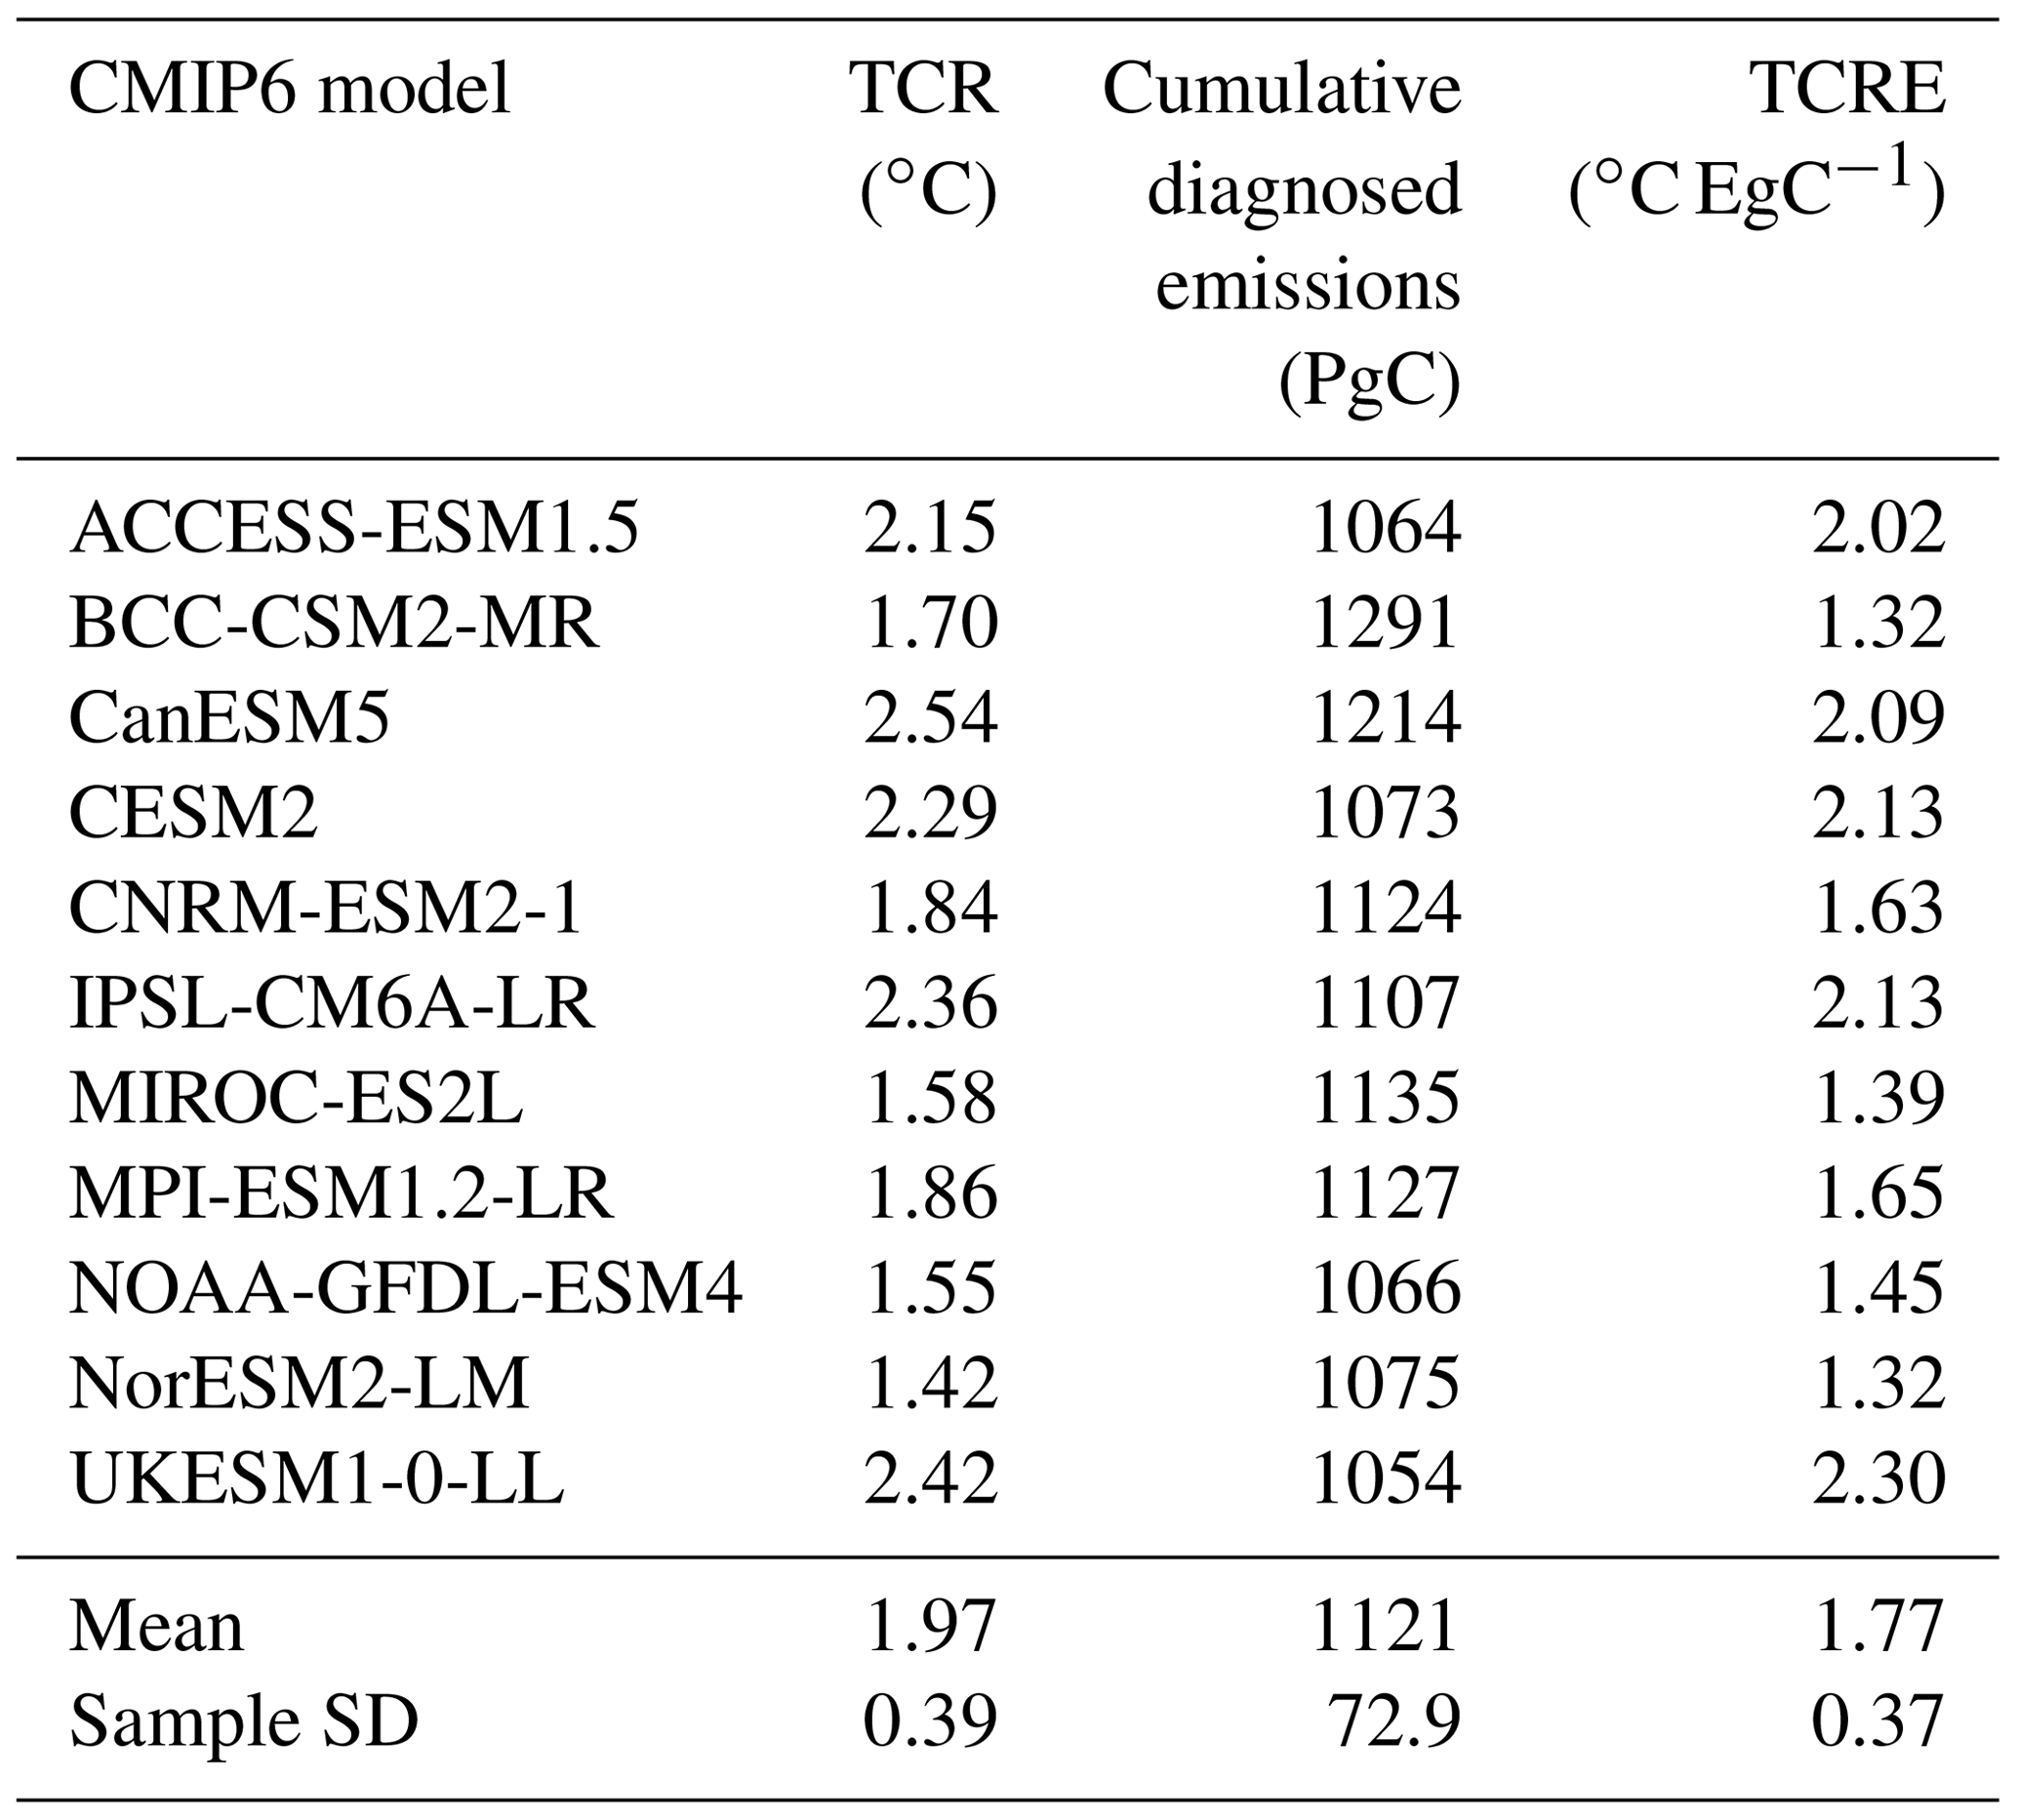

In [11]:
TCR_dict = {'NORESM2':1.42, 'GFDL':1.55, 'UKESM1_r1':2.42, 'MIROC': 1.58, 'ACCESS': 2.15, 'CANESM5_r1p2': 2.54}

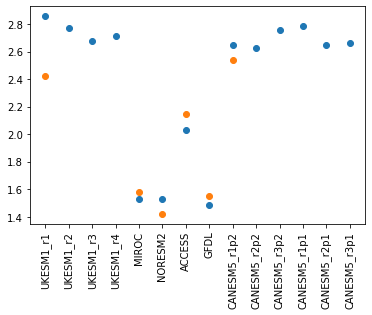

In [68]:
plt.plot(ds_dif['model'].values, ds_dif.isel(s = slice(60,80)).weighted(A).mean(dim = ['s', 'lon','lat'])['tas'], 'o')
plt.plot(TCR_dict.keys(), TCR_dict.values(), 'o')
plt.xticks(rotation = 90);

In [12]:
G_ds = xr.open_dataset('Outputs/G_ds.nc4')['__xarray_dataarray_variable__']
G_mean_ds = xr.open_dataset('Outputs/G_mean_ds.nc4')['__xarray_dataarray_variable__']

# anom_G_ds = xr.open_dataset('Outputs/anom_G_ds.nc4')['tas']
# anom_G_mean_ds = xr.open_dataset('Outputs/anom_G_mean_ds.nc4')['tas']

In [13]:
G_ds = G_ds.isel(year = slice(0, 100))
G_mean_ds = G_mean_ds.isel(year = slice(0, 100))

In [14]:
G_ds.name = 'G[tas]'

## Linear Regression

In [15]:
G_ds_weighted_mean = G_mean_ds.weighted(A).mean(dim = ['lat','lon']).dropna(dim = 'year')

ds_dif_weighted_mean = ds_dif.weighted(A).mean(dim = ['lat','lon']).dropna(dim = 's')['tas']

def linregress_ds(ds_in, time_var):
    '''Linear regression along a dataarray/dataset variable, returning a new dataset of the same shape. Must select a variable from the dataset or use a data array
    time_var is the name of the time variable (eg: year, time, etc)'''
    ds_linregress = xr.zeros_like(ds_in)
    ds_linregress[time_var] = np.arange(0,len(ds_in[time_var]))
    ds_linregress = ds_linregress.rename({time_var:'time'})
    ds_linregress.time.attrs = {'unit':time_var}
    for t in np.arange(1, len(ds_in[time_var])):
        x = np.arange(0,len(ds_in[time_var]))[:t]
        y = ds_in.values[:t]
        res = stats.linregress(x,y)
        time_var = time_var
        ds_linregress.loc[dict(time = t)] = res.slope
    return(ds_linregress)

ds_dif_regress = linregress_ds(ds_dif_weighted_mean, 'year')

ds_dif_regress.to_netcdf('ds_dif_regress.nc4')

G_linregress = linregress_ds(G_ds_weighted_mean, 'year')

plt.plot(G_linregress)
plt.plot(G_ds_weighted_mean)

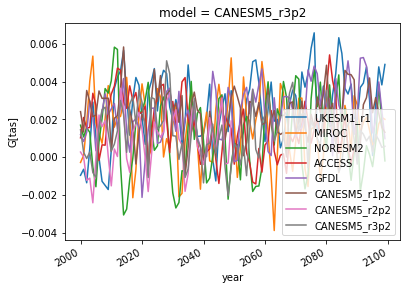

In [14]:
for m in G_ds.model.values:
    G_ds.weighted(A).mean(dim = ['lat','lon']).sel(model = m).plot(label = m)
    plt.legend()

## Rolling means

G_10yr_roll_ds = G_ds.rolling(year = 10).mean(center = True).dropna("year")
G_20yr_roll_ds = G_ds.rolling(year = 20).mean(center = True).dropna("year")

G_10yr_mean_roll_ds = G_mean_ds.rolling(year = 10).mean(center = True).dropna("year")
G_20yr_mean_roll_ds = G_mean_ds.rolling(year = 20).mean(center = True).dropna("year")

In [16]:
G_ds = G_ds.rename({'year':'s'})
#G_10yr_roll_ds = G_10yr_roll_ds.rename({'year':'s'})
#G_20yr_roll_ds = G_20yr_roll_ds.rename({'year':'s'})
#ds_dif = ds_dif.rename({'year':'s'})


In [17]:
G_mean_ds = G_mean_ds.rename({'year':'s'})
#G_10yr_mean_roll_ds = G_10yr_mean_roll_ds.rename({'year':'s'})
#G_20yr_mean_roll_ds = G_20yr_mean_roll_ds.rename({'year':'s'})


## Emissions profile

In [18]:
emis_profile = {}
emis_profile['annual'] = xr.open_dataset(f'1pct_emis_profile_full.nc4')
#emis_profile['annual']['Model_mean'] = emis_profile['annual'].mean()
emis_profile['annual'] = emis_profile['annual'].rename({'__xarray_dataarray_variable__':'emis'})

# emis_profile['10rolling'] = xr.open_dataset(f'1pct_emis_profile_rolling10.nc4')
# #emis_profile['10rolling']['Model_mean'] = emis_profile['10rolling'].groupby('model').mean()
# emis_profile['10rolling'] = emis_profile['10rolling'].rename({'__xarray_dataarray_variable__':'emis'})

# emis_profile['20rolling'] = xr.open_dataset(f'1pct_emis_profile_rolling20.nc4')
# #emis_profile['20rolling']['Model_mean'] = emis_profile['20rolling'].groupby('model').mean()
# emis_profile['20rolling'] = emis_profile['20rolling'].rename({'__xarray_dataarray_variable__':'emis'})

## Global Mean Analysis

for m in emis_profile.keys():
    emis_profile[m] = emis_profile[m].where(emis_profile[m].model.isin(['ACCESS','GFDL','NORESM2','MIROC']), drop = True)


fig, ax = plt.subplots()
for nm in emis_profile.keys():
    plt.plot(emis_profile[nm].mean(dim = 'model')['emis'], label = f'{nm} emissions diagnosed')
plt.legend()
plt.savefig('figures/1pct_increase/emis_profiles_rolling_means.png', bbox_inches = 'tight', dpi = 350)

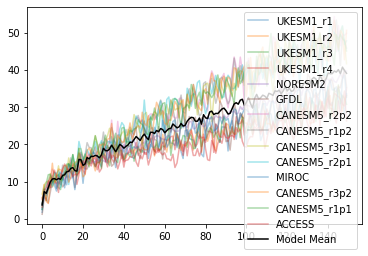

In [19]:
fig, ax = plt.subplots()
for m in emis_profile['annual'].model.values:
    plt.plot(emis_profile['annual'].sel(model = m)['emis'], alpha = .4, label = f'{m}')
plt.plot(emis_profile['annual'].mean(dim = 'model')['emis'], color = 'k', label = f'Model Mean')
plt.legend()
plt.savefig('figures/1pct_increase/emis_profiles.png', bbox_inches = 'tight', dpi = 350)

fig, ax = plt.subplots()
#plt.plot(emis_profile['annual'].mean(dim = 'model')['emis'], color = 'k', label = f'Model Mean')
for m in ['UKESM1_r1', 'UKESM1_r2','UKESM1_r3','UKESM1_r4']:
    plt.plot(emis_profile['annual'].sel(model = m)['emis'], alpha = .4, label = f'{m}')
plt.legend()
#plt.savefig('figures/1pct_increase/emis_profiles.png', bbox_inches = 'tight', dpi = 350)

for nm in ds_GF_dict.keys():
    emis_profile[nm] = emis_profile[nm].sel(model = ['MIROC','GFDL'])

In [20]:
%%time
ds_GF_mean_dict = {'annual':G_mean_ds.weighted(A).mean(dim = ['lat','lon']), 
              #'10rolling':G_10yr_mean_roll_ds.weighted(A).mean(dim = ['lat','lon']), 
              #'20rolling':G_20yr_mean_roll_ds.weighted(A).mean(dim = ['lat','lon'])
                  }
ds_GF_dict = {'annual':G_ds.weighted(A).mean(dim = ['lat','lon']), 
              #'10rolling':G_10yr_roll_ds.weighted(A).mean(dim = ['lat','lon']), 
              #'20rolling':G_20yr_roll_ds.weighted(A).mean(dim = ['lat','lon'])
             }
conv_1pct_mean = {}
#linregress_1pct_conv = {}

for nm in ['annual']: 
    print(nm)
    conv_1pct_mean[nm] = {}
    #linregress_1pct_conv[nm] = {}
    print(nm)
    conv_1pct_mean[nm]['mean'] = signal.convolve(np.array(emis_profile[nm].mean(dim = 'model')['emis']), np.array(ds_GF_mean_dict[nm]), 'full')
    conv_1pct_mean[nm]['mean'] = utils.np_to_xr_mean(conv_1pct_mean[nm]['mean'], ds_GF_mean_dict[nm], emis_profile[nm].mean(dim = 'model')['emis'])
    #linregress_1pct_conv[nm]['mean'] = linregress_ds(conv_1pct_mean[nm]['mean'], 's')
    for m1 in ['UKESM1_r1', 'UKESM1_r2', 'UKESM1_r3', 'UKESM1_r4', 'NORESM2',
       'GFDL', 'MIROC', 'CANESM5_r1p2', 'CANESM5_r2p2', 'ACCESS', 'CANESM5_r3p2',]:
        if m1 == 'UKESM1_r1' or m1 == 'UKESM1_r2' or m1 == 'UKESM1_r3' or m1 == 'UKESM1_r4':
            m2 = 'UKESM1_r1'
        else:
            m2 = m1
        print(m1, m2)
        conv_1pct_mean[nm][m1] = signal.convolve(np.array(emis_profile[nm].sel(model = m1)['emis']), np.array(ds_GF_dict[nm].sel(model = m2)), 'full')
        conv_1pct_mean[nm][m1] = utils.np_to_xr_mean(conv_1pct_mean[nm][m1], ds_GF_dict[nm].sel(model = m2), emis_profile[nm].sel(model = m1))
        #linregress_1pct_conv[nm][m] = linregress_ds(conv_1pct_mean[nm][m], 's') 

annual
annual
UKESM1_r1 UKESM1_r1
UKESM1_r2 UKESM1_r1
UKESM1_r3 UKESM1_r1
UKESM1_r4 UKESM1_r1
NORESM2 NORESM2
GFDL GFDL
MIROC MIROC
CANESM5_r1p2 CANESM5_r1p2
CANESM5_r2p2 CANESM5_r2p2
ACCESS ACCESS
CANESM5_r3p2 CANESM5_r3p2
CPU times: user 496 ms, sys: 448 ms, total: 944 ms
Wall time: 949 ms


In [21]:
model_color = utils.model_color # {'UKESM1_r1':'olive', 'UKESM1_r2':'brown', 'UKESM1_r3':'green', 'UKESM1_r4':'lightgreen', 'NORESM2':'blue', 'GFDL':'red', 'MIROC':'purple', 'ACCESS':'pink'}


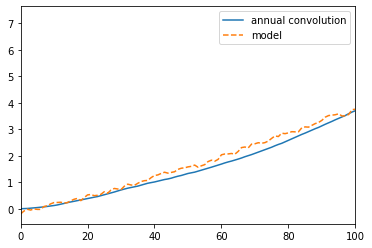

In [22]:
for nm in conv_1pct_mean.keys():
    plt.plot(conv_1pct_mean[nm]['mean'], label = f'{nm} convolution')
plt.plot(np.arange(0,len(ds_dif['s'])), ds_dif.weighted(A).mean(dim = ['lat','lon','model'])['tas'], label = 'model', linestyle = '--')
#plt.plot(np.arange(0,len(ds_dif.weighted(A).mean(dim = ['lat','lon','model'])['tas'].rolling(s = 10).mean(center = True).dropna("s")['s'])), ds_dif.weighted(A).mean(dim = ['lat','lon','model'])['tas'].rolling(s = 10).mean(center = True).dropna("s"), label = '10 rolling model', linestyle = '--')
#plt.plot(np.arange(0,len(ds_dif.weighted(A).mean(dim = ['lat','lon','model'])['tas'].rolling(s = 20).mean(center = True).dropna("s")['s'])), ds_dif.weighted(A).mean(dim = ['lat','lon','model'])['tas'].rolling(s = 20).mean(center = True).dropna("s"), label = '20 rolling model', linestyle = '--')

plt.legend()
plt.xlim(0,100)
plt.savefig('figures/1pct_increase/model_mean_convolution_vs_1pct.png', bbox_inches = 'tight', dpi = 350)


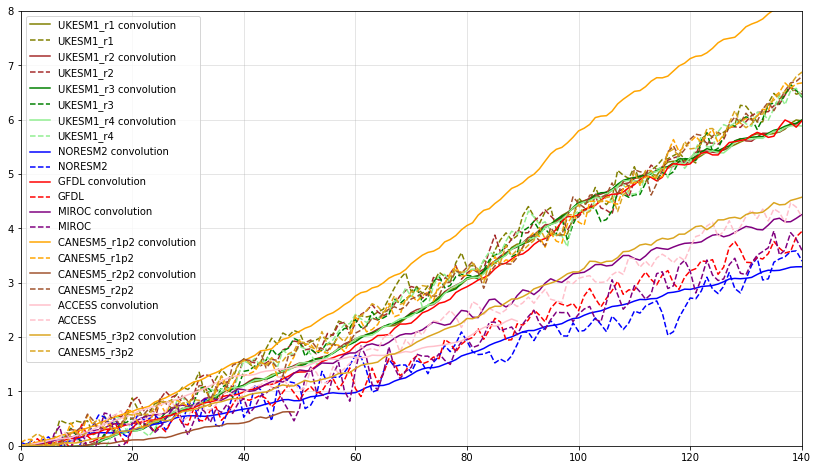

In [23]:
fig, ax = plt.subplots(figsize = [14,8])
for m in ['UKESM1_r1', 'UKESM1_r2', 'UKESM1_r3', 'UKESM1_r4', 'NORESM2', 'GFDL', 'MIROC', 'CANESM5_r1p2', 'CANESM5_r2p2', 'ACCESS', 'CANESM5_r3p2']:
    plt.plot(conv_1pct_mean['annual'][m], label = f'{m} convolution', color = model_color[m])
    plt.plot(np.arange(0,len(ds_dif['s'])), ds_dif.weighted(A).mean(dim = ['lat','lon']).sel(model = m)['tas'], label = m, linestyle = '--', color = model_color[m])
plt.grid(alpha = 0.4)
plt.legend()
plt.xlim(0,140)
plt.ylim(0,8)
plt.savefig('figures/1pct_increase/all_models_convolution_vs_1pct.png', bbox_inches = 'tight', dpi = 350)


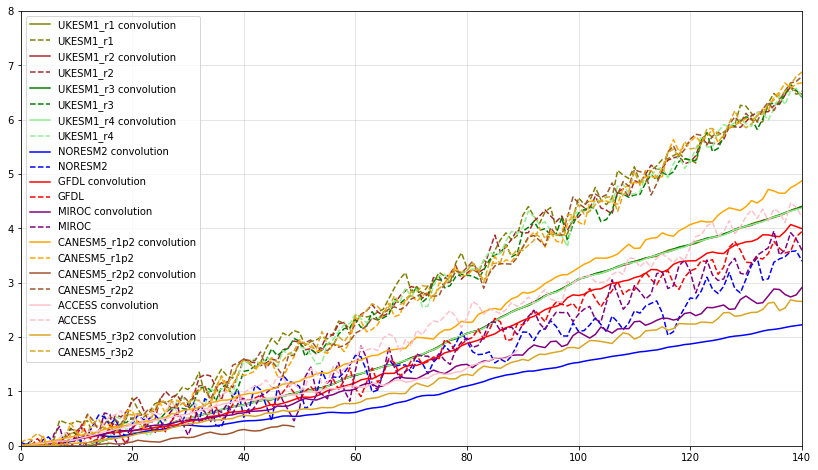

In [79]:
fig, ax = plt.subplots(figsize = [14,8])
for m in ['UKESM1_r1', 'UKESM1_r2', 'UKESM1_r3', 'UKESM1_r4', 'NORESM2', 'GFDL', 'MIROC', 'CANESM5_r1p2', 'CANESM5_r2p2', 'ACCESS', 'CANESM5_r3p2']:
    plt.plot(conv_1pct_mean['annual'][m], label = f'{m} convolution', color = model_color[m])
    plt.plot(np.arange(0,len(ds_dif['s'])), ds_dif.weighted(A).mean(dim = ['lat','lon']).sel(model = m)['tas'], label = m, linestyle = '--', color = model_color[m])
plt.grid(alpha = 0.4)
plt.legend()
plt.xlim(0,140)
plt.ylim(0,8)
plt.savefig('figures/1pct_increase/all_models_convolution_vs_1pct.png', bbox_inches = 'tight', dpi = 350)


(0.0, 100.0)

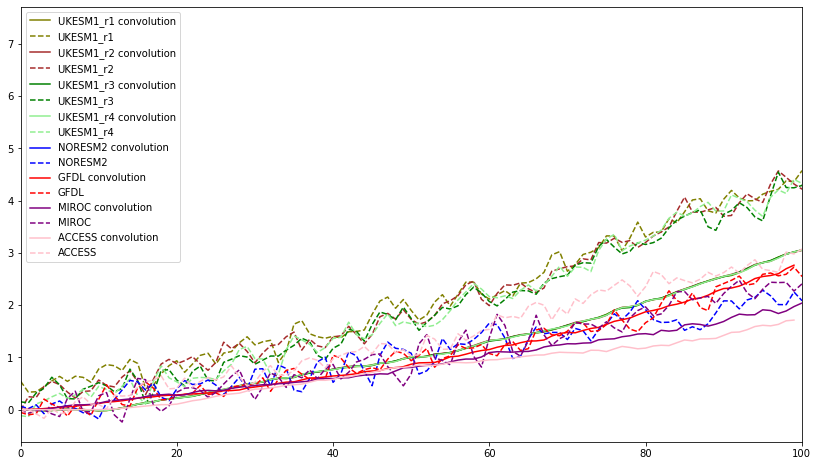

In [43]:
fig, ax = plt.subplots(figsize = [14,8])
for m in ['UKESM1_r1', 'UKESM1_r2', 'UKESM1_r3', 'UKESM1_r4', 'NORESM2', 'GFDL', 'MIROC', 'ACCESS']:
    plt.plot(conv_1pct_mean['annual'][m], label = f'{m} convolution', color = model_color[m])
    plt.plot(np.arange(0,len(ds_dif['s'])), ds_dif.weighted(A).mean(dim = ['lat','lon']).sel(model = m)['tas'], label = m, linestyle = '--', color = model_color[m])

plt.legend()
plt.xlim(0,100)
#plt.savefig('figures/1pct_increase/all_models_convolution_vs_1pct.png', bbox_inches = 'tight', dpi = 350)


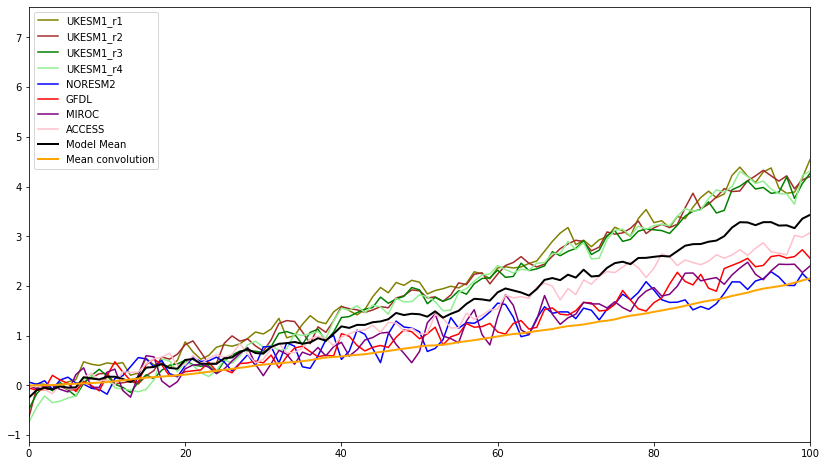

In [64]:
fig, ax = plt.subplots(figsize = [14,8])
for m in ['UKESM1_r1', 'UKESM1_r2', 'UKESM1_r3', 'UKESM1_r4', 'NORESM2', 'GFDL', 'MIROC', 'ACCESS']:
    plt.plot(np.arange(0,len(ds_dif['s'])), ds_dif.weighted(A).mean(dim = ['lat','lon']).sel(model = m)['tas'], label = m, color = model_color[m])
plt.plot(np.arange(0,len(ds_dif['s'])), ds_dif.weighted(A).mean(dim = ['lat','lon','model'])['tas'], label = 'Model Mean', color = 'k', linewidth = 2)
plt.plot(conv_1pct_mean['annual']['mean'], label = f'Mean convolution', color = 'orange', linewidth = 2)

plt.legend()
plt.xlim(0,100)
plt.savefig('figures/1pct_increase/all_models_vs_mean_simulation_vs_1pct.png', bbox_inches = 'tight', dpi = 350)


(0.0, 100.0)

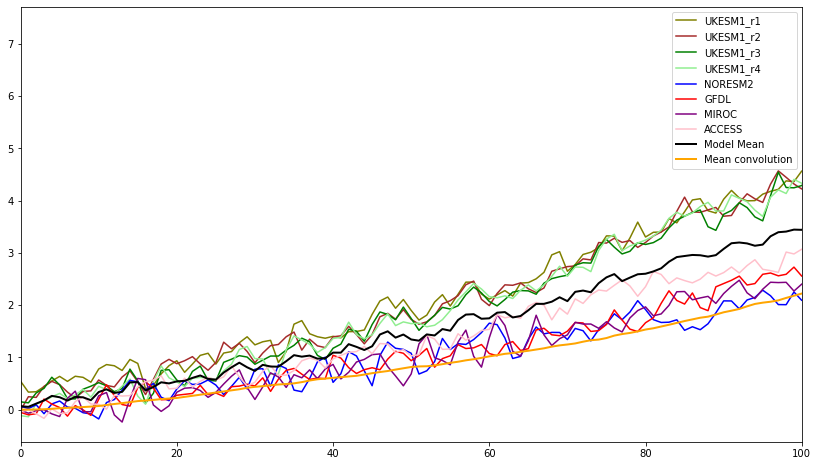

In [44]:
fig, ax = plt.subplots(figsize = [14,8])
for m in ['UKESM1_r1', 'UKESM1_r2', 'UKESM1_r3', 'UKESM1_r4', 'NORESM2', 'GFDL', 'MIROC', 'ACCESS']:
    plt.plot(np.arange(0,len(ds_dif['s'])), ds_dif.weighted(A).mean(dim = ['lat','lon']).sel(model = m)['tas'], label = m, color = model_color[m])
plt.plot(np.arange(0,len(ds_dif['s'])), ds_dif.weighted(A).mean(dim = ['lat','lon','model'])['tas'], label = 'Model Mean', color = 'k', linewidth = 2)
plt.plot(conv_1pct_mean['annual']['mean'], label = f'Mean convolution', color = 'orange', linewidth = 2)

plt.legend()
plt.xlim(0,100)
#plt.savefig('figures/1pct_increase/all_models_vs_mean_simulation_vs_1pct.png', bbox_inches = 'tight', dpi = 350)


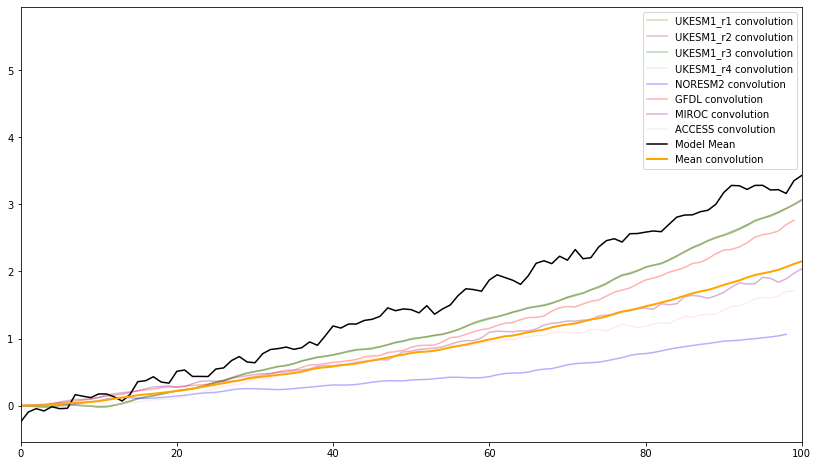

In [65]:
fig, ax = plt.subplots(figsize = [14,8])
for m in ['UKESM1_r1', 'UKESM1_r2', 'UKESM1_r3', 'UKESM1_r4', 'NORESM2', 'GFDL', 'MIROC', 'ACCESS']:
    plt.plot(conv_1pct_mean['annual'][m], label = f'{m} convolution', alpha = .3, color = model_color[m])
plt.plot(np.arange(0,len(ds_dif['s'])), ds_dif.weighted(A).mean(dim = ['lat','lon','model'])['tas'], label = 'Model Mean', color = 'k')
plt.plot(conv_1pct_mean['annual']['mean'], label = f'Mean convolution', color = 'orange', linewidth = 2)

plt.legend()
plt.xlim(0,100)
plt.savefig('figures/1pct_increase/all_models_vs_mean_convolution_vs_1pct.png', bbox_inches = 'tight', dpi = 350)


(0.0, 100.0)

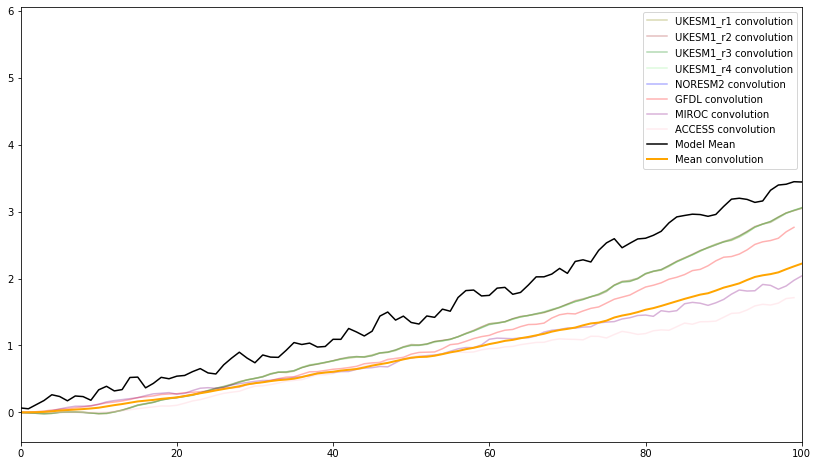

In [45]:
fig, ax = plt.subplots(figsize = [14,8])
for m in ['UKESM1_r1', 'UKESM1_r2', 'UKESM1_r3', 'UKESM1_r4', 'NORESM2', 'GFDL', 'MIROC', 'ACCESS']:
    plt.plot(conv_1pct_mean['annual'][m], label = f'{m} convolution', alpha = .3, color = model_color[m])
plt.plot(np.arange(0,len(ds_dif['s'])), ds_dif.weighted(A).mean(dim = ['lat','lon','model'])['tas'], label = 'Model Mean', color = 'k')
plt.plot(conv_1pct_mean['annual']['mean'], label = f'Mean convolution', color = 'orange', linewidth = 2)

plt.legend()
plt.xlim(0,100)
#plt.savefig('figures/1pct_increase/all_models_vs_mean_convolution_vs_1pct.png', bbox_inches = 'tight', dpi = 350)


## TCRE

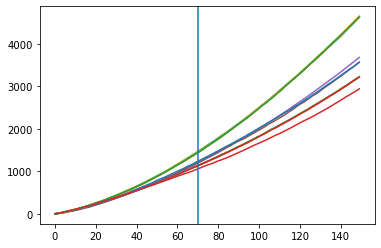

In [25]:
plt.plot(emis_profile['annual'].cumsum(dim = 'year')['emis'].transpose());
plt.axvline(70)

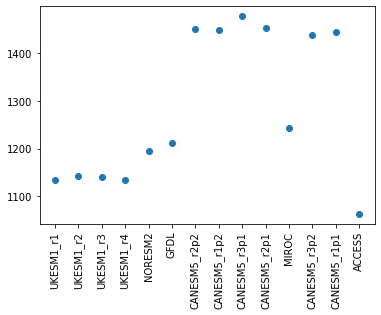

In [24]:
plt.plot(emis_profile['annual'].model, emis_profile['annual'].sel(year = slice(0,70)).sum(dim = 'year')['emis'].values, 'o')
plt.xticks(rotation = 90);

In [90]:
emis_profile['annual'].sel(year = slice(0,70)).sum(dim = 'year')['emis'].values

array([764.71064746, 766.43122549, 766.08893839, 764.68325416,
       771.21144565, 766.16061891, 823.69952946, 752.90562277,
       825.37552366, 825.60265127, 832.89217009, 720.29031487,
       822.52339235, 826.41138357])

## Linear Regression specific location analysis

In [265]:
loc_dif = {}
loc_1pct = {}

loc_dif_regress = {}
loc_1pct_conv = {}

loc_lat = {'Antarctic':-80,'North America': 40, 'Africa': 20}
loc_lon = {'Antarctic':200, 'North America': 280, 'Africa': 20}


for loc in loc_lat.keys():
    #select location
    loc_dif[loc] = ds_dif.sel(lat = loc_lat[loc], lon = loc_lon[loc], method = 'nearest')['tas']
    loc_1pct[loc] = conv_1pct['annual'].sel(lat = loc_lat[loc], lon = loc_lon[loc], method = 'nearest')
    #regression
    loc_dif_regress[loc] = xr.zeros_like(loc_dif[loc])
    for t in np.arange(1,len(loc_dif[loc].s)):
        reg = loc_dif[loc].sel(s = slice(0,t)).polyfit(dim = 's', deg = 1)
        loc_dif_regress[loc].loc[dict(s = t)] = reg['polyfit_coefficients'].sel(degree = 1)
    loc_1pct_conv[loc] = xr.zeros_like(loc_1pct[loc])
    for t in np.arange(1,len(loc_1pct[loc].s)):
        reg = loc_1pct[loc].sel(s = slice(0,t)).polyfit(dim = 's', deg = 1)
        loc_1pct_conv[loc].loc[dict(s = t)] = reg['polyfit_coefficients'].sel(degree = 1)

/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])


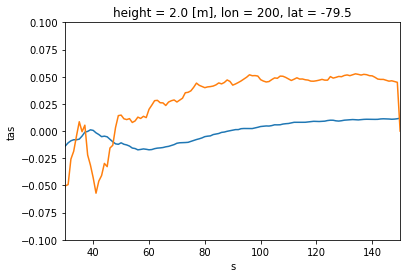

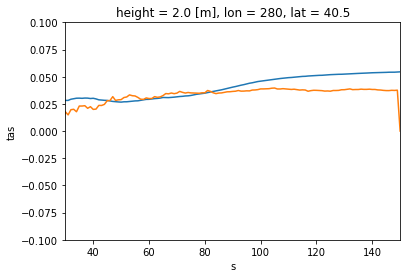

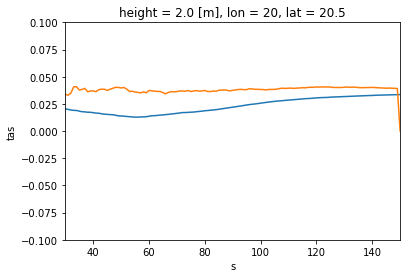

In [275]:
for loc in loc_lat.keys():
    fig, ax = plt.subplots()
    loc_1pct_conv[loc].plot()
    loc_dif_regress[loc].plot()
    plt.ylim(-0.1,0.1)
    plt.xlim(30,150)

## Linear Regression spatial test

In [173]:
linregress_dif = ds_dif.polyfit(dim = 's', deg = 1)

In [224]:
t = 100

In [225]:
test_dif = ds_dif.sel(s = slice(0,t)).polyfit(dim = 's', deg = 1)

In [226]:
test_1pct = conv_1pct['annual'].sel(s = slice(0,t)).polyfit(dim = 's', deg = 1)

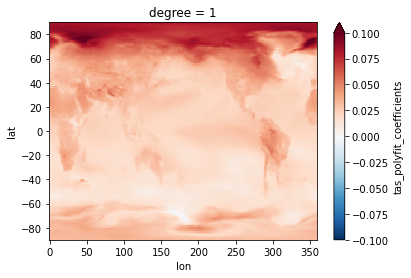

In [282]:
test_dif.sel(degree = 1)['tas_polyfit_coefficients'].plot(vmin = -0.1, vmax = 0.1, cmap = 'RdBu_r')

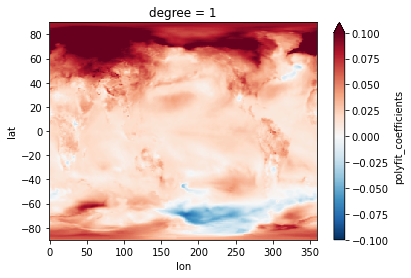

In [283]:
test_1pct.sel(degree = 1)['polyfit_coefficients'].plot(vmin = -0.1, vmax = 0.1, cmap = 'RdBu_r')

/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


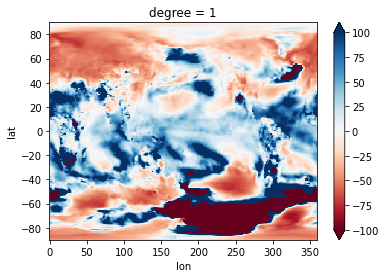

In [236]:
(((test_dif.sel(degree = 1)['tas_polyfit_coefficients']-test_1pct.sel(degree = 1)['polyfit_coefficients'])/
  test_1pct.sel(degree = 1)['polyfit_coefficients'])*100).plot(vmax = 100, vmin = -100, cmap = 'RdBu')

In [234]:
(((test_dif.sel(degree = 1)['tas_polyfit_coefficients']-test_1pct.sel(degree = 1)['polyfit_coefficients'])/test_1pct.sel(degree = 1)['polyfit_coefficients'])*100).mean().values

/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


array(-6.1056034)

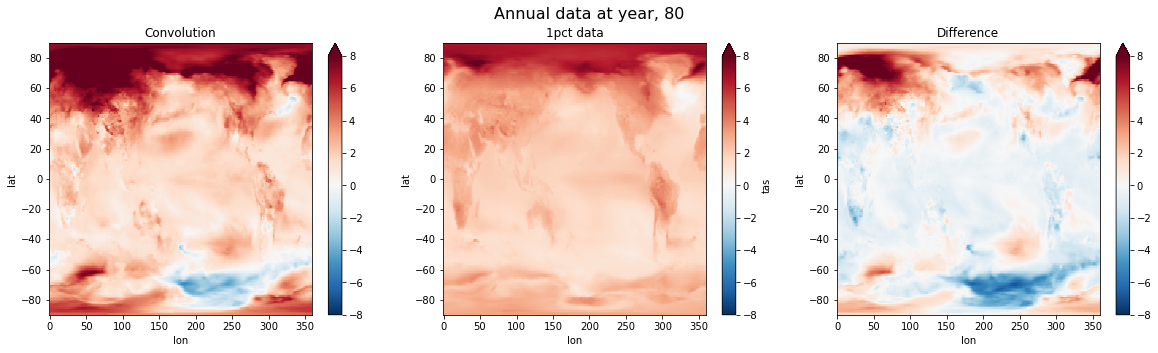

In [228]:
for t in [80]:#, 30, 60, 80]:
    fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize = [20,5])
    
    conv_1pct['annual'].sel(s = slice(t, t+20)).mean('s').plot(ax = ax1, vmax = 8, vmin = -8, cmap = 'RdBu_r')
    ax1.set_title('Convolution')
    
    ds_dif['tas'].sel(s = slice(t, t+20)).mean('s').plot(ax = ax2, vmax = 8, vmin = -8, cmap = 'RdBu_r')
    ax2.set_title('1pct data')
    
    (conv_1pct['annual'] - ds_dif['tas']).sel(s = slice(t, t+20)).mean('s').plot(ax = ax3, vmax = 8, vmin = -8, cmap = 'RdBu_r')
    ax3.set_title('Difference')
    
    plt.suptitle(f'Annual data at year, {t}', fontsize = 16)
    #plt.savefig(f'figures/1pct_increase/map_convolution_{t}.png', bbox_inches = 'tight', dpi = 350)


In [214]:
linregress_1pct = xr.zeros_like(conv_1pct['annual'])
for t in np.arange(1,len(conv_1pct['annual'].s))[80:]:
    reg = conv_1pct['annual'].sel(s = slice(0,t)).polyfit(dim = 's', deg = 1)
    linregress_1pct.loc[dict(s = t)] = reg['tas_polyfit_coefficients'].sel(degree = 1)

KeyboardInterrupt: 

In [ ]:
linregress_dif = xr.zeros_like(ds_dif)
for t in np.arange(1,len(ds_dif.s))[80:]:
    reg = ds_dif.sel(s = slice(0,t)).polyfit(dim = 's', deg = 1)
    linregress_dif.loc[dict(s = t)] = reg['tas_polyfit_coefficients'].sel(degree = 1)

In [ ]:
linregress_dif['tas'].weighted(A).mean(dim = ['lat','lon'])

## Spatial Analysis

In [211]:

ds_GF_dict = {'annual':G_ds,'10rolling':G_10yr_roll_ds, '20rolling':G_20yr_roll_ds}


In [212]:
%%time
conv_1pct = {}
for nm in ds_GF_dict.keys():   
    conv_1pct[nm] = signal.convolve(emis_profile[nm][..., None, None], np.array(ds_GF_dict[nm].sel(model = 'GFDL').fillna(0)), 'full')
    conv_1pct[nm] = utils.np_to_xr(conv_1pct[nm], ds_GF_dict[nm].sel(model = 'GFDL'), emis_profile[nm])

CPU times: user 1.16 s, sys: 604 ms, total: 1.76 s
Wall time: 1.77 s


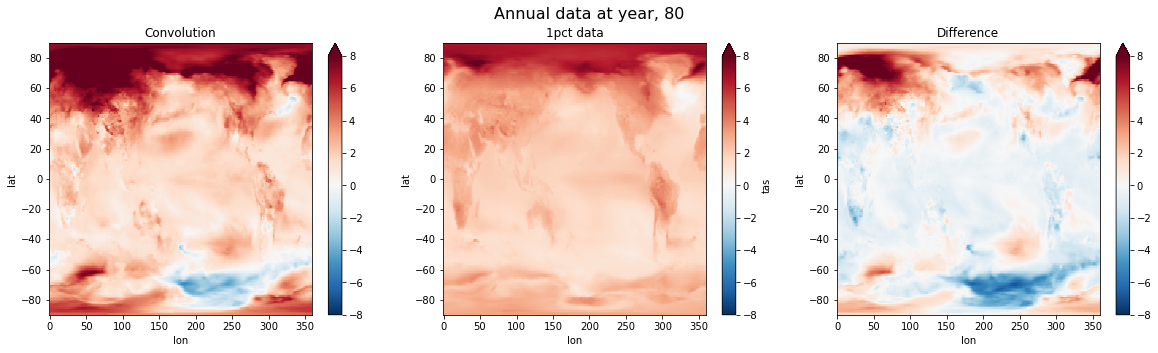

In [32]:
for t in [80]:#, 30, 60, 80]:
    fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize = [20,5])
    
    conv_1pct['annual'].sel(s = slice(t, t+20)).mean('s').plot(ax = ax1, vmax = 8, vmin = -8, cmap = 'RdBu_r')
    ax1.set_title('Convolution')
    
    ds_dif['tas'].sel(s = slice(t, t+20)).mean('s').plot(ax = ax2, vmax = 8, vmin = -8, cmap = 'RdBu_r')
    ax2.set_title('1pct data')
    
    (conv_1pct['annual'] - ds_dif['tas']).sel(s = slice(t, t+20)).mean('s').plot(ax = ax3, vmax = 8, vmin = -8, cmap = 'RdBu_r')
    ax3.set_title('Difference')
    
    plt.suptitle(f'Annual data at year, {t}', fontsize = 16)
    #plt.savefig(f'figures/1pct_increase/map_convolution_{t}.png', bbox_inches = 'tight', dpi = 350)


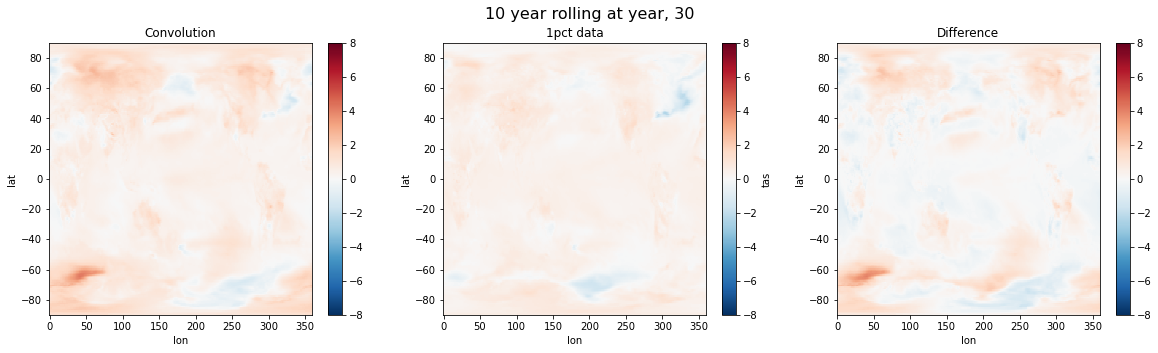

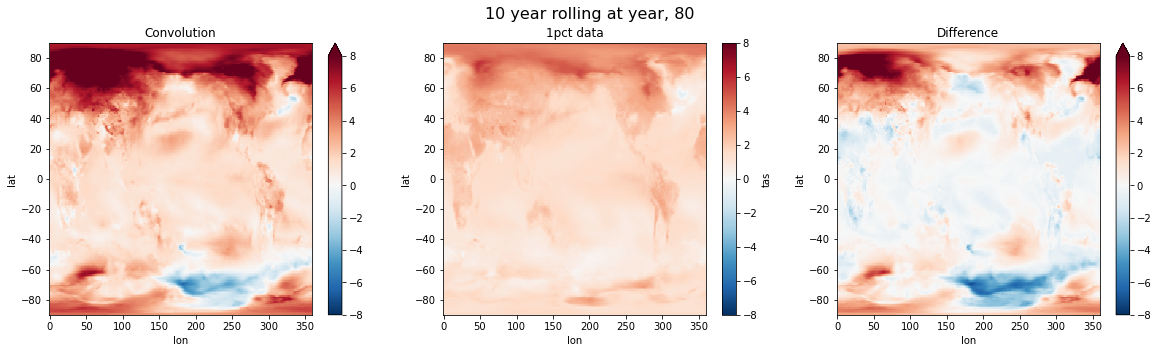

In [30]:
for t in [30, 80]:
    fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize = [20,5])
    
    conv_1pct['10rolling'].sel(s = t).plot(ax = ax1, vmax = 8, vmin = -8, cmap = 'RdBu_r')
    ax1.set_title('Convolution')
    
    ds_dif['tas'].rolling(s = 10).mean('s').dropna('s').sel(s = t).plot(ax = ax2, vmax = 8, vmin = -8, cmap = 'RdBu_r')
    ax2.set_title('1pct data')
    
    (conv_1pct['10rolling'].sel(s=t) - ds_dif['tas'].rolling(s = 10).mean('s').dropna('s')).sel(s = t).plot(ax = ax3, vmax = 8, vmin = -8, cmap = 'RdBu_r')
    ax3.set_title('Difference')
    
    plt.suptitle(f'10 year rolling at year, {t}', fontsize = 16)
    #plt.savefig(f'figures/1pct_increase/map_convolution_{t}.png', bbox_inches = 'tight', dpi = 350)


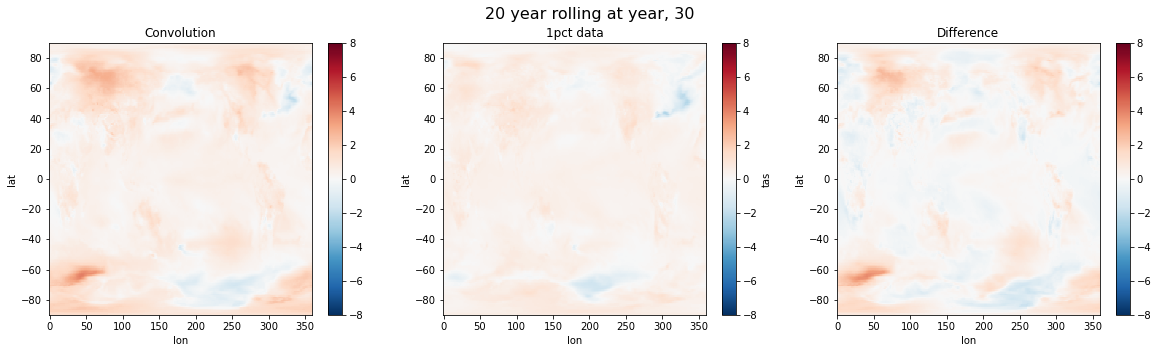

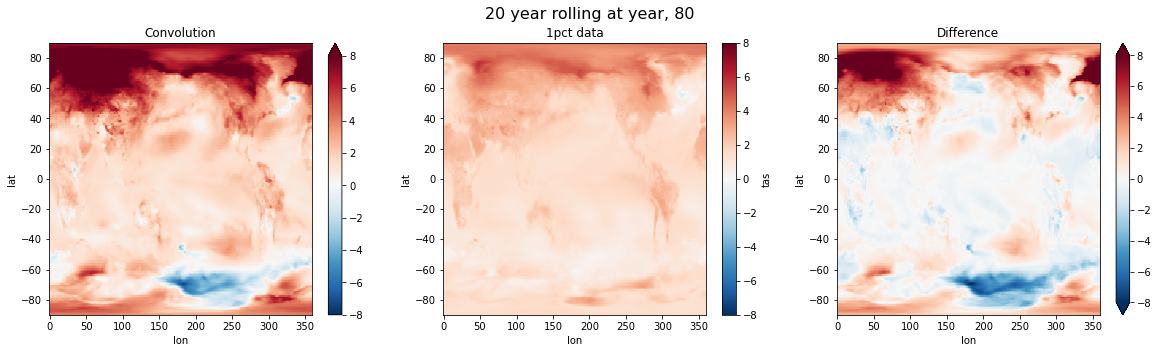

In [31]:
for t in [30, 80]:
    fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize = [20,5])
    
    conv_1pct['20rolling'].sel(s = t).plot(ax = ax1, vmax = 8, vmin = -8, cmap = 'RdBu_r')
    ax1.set_title('Convolution')
    
    ds_dif['tas'].rolling(s = 10).mean('s').dropna('s').sel(s = t).plot(ax = ax2, vmax = 8, vmin = -8, cmap = 'RdBu_r')
    ax2.set_title('1pct data')
    
    (conv_1pct['20rolling'].sel(s=t) - ds_dif['tas'].rolling(s = 10).mean('s').dropna('s')).sel(s = t).plot(ax = ax3, vmax = 8, vmin = -8, cmap = 'RdBu_r')
    ax3.set_title('Difference')
    
    plt.suptitle(f'20 year rolling at year, {t}', fontsize = 16)
    #plt.savefig(f'figures/1pct_increase/map_convolution_{t}.png', bbox_inches = 'tight', dpi = 350)


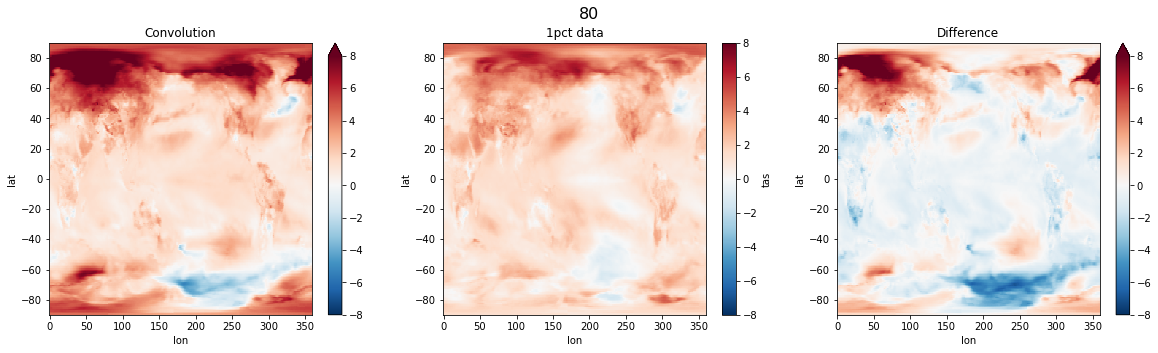

In [23]:
for t in [80]:#, 30, 60, 80]:
    fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize = [20,5])
    
    conv_1pct['sinks'].sel(s = t).plot(ax = ax1, vmax = 8, vmin = -8, cmap = 'RdBu_r')
    ax1.set_title('Convolution')
    
    ds_dif['tas'].sel(s = t).plot(ax = ax2, vmax = 8, vmin = -8, cmap = 'RdBu_r')
    ax2.set_title('1pct data')
    
    (conv_1pct['sinks'] - ds_dif['tas']).sel(s = slice(t, t+20)).mean('s').plot(ax = ax3, vmax = 8, vmin = -8, cmap = 'RdBu_r')
    ax3.set_title('Difference')
    
    plt.suptitle(t, fontsize = 16)
    #plt.savefig(f'figures/1pct_increase/map_convolution_{t}.png', bbox_inches = 'tight', dpi = 350)


## Group base by month 

## Test the start date of our difference

In [24]:
ds_base2 = ds_base.isel(time = slice(12*100,6000))
ds_base2['time'] = ds_base['time'][:len(ds_base2.time)]

In [25]:
ds_base3 = ds_base.isel(time = slice(12*200,6000))
ds_base3['time'] = ds_base['time'][:len(ds_base3.time)]

In [26]:
ds_dif2 = ds_1pct - ds_base2
ds_dif3 = ds_1pct - ds_base3

In [27]:
ds_dif2 = ds_dif2.groupby('time.year').mean()
ds_dif3 = ds_dif3.groupby('time.year').mean()

In [31]:
ds_dif2 = ds_dif2.rename({'year':'s'})
ds_dif3 = ds_dif3.rename({'year':'s'})

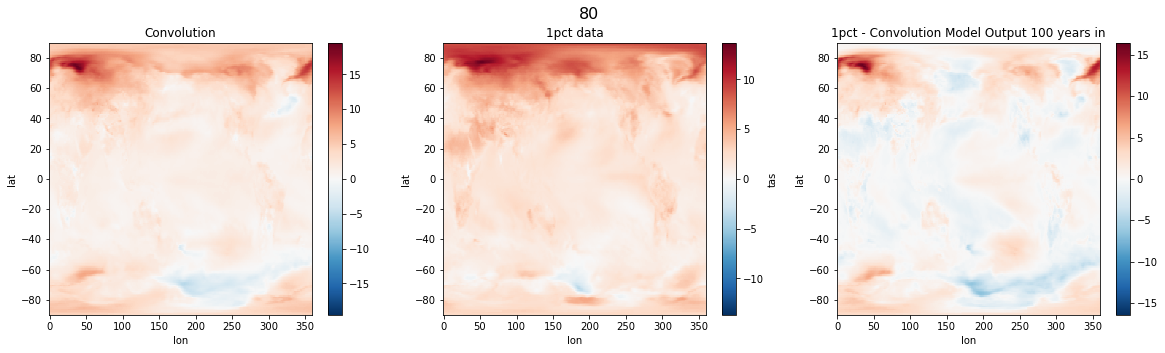

In [32]:
for t in [80]:
    fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize = [20,5])
    conv_1pct['sinks'].sel(s = t).plot(ax = ax1)
    ax1.set_title('Convolution')
    
    ds_dif2['tas'].sel(s = t).plot(ax = ax2)
    ax2.set_title('1pct data')
    
    (conv_1pct['sinks'] - ds_dif['tas']).sel(s = t).plot(ax = ax3)
    ax3.set_title('1pct - Convolution Model Output 100 years in')
    
    plt.suptitle(f'{t}', fontsize = 16)

In [ ]:
for t in [80]:
    fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize = [20,5])
    conv_1pct['sinks'].sel(s = t).plot(ax = ax1)
    ax1.set_title('Convolution')
    
    ds_dif2['tas'].sel(s = t).plot(ax = ax2)
    ax2.set_title('1pct data')
    
    (conv_1pct['sinks'] - ds_dif['tas']).sel(s = t).plot(ax = ax3)
    ax3.set_title('1pct - Convolution Model Output 100 years in')
    
    plt.suptitle(f'{t}', fontsize = 16)

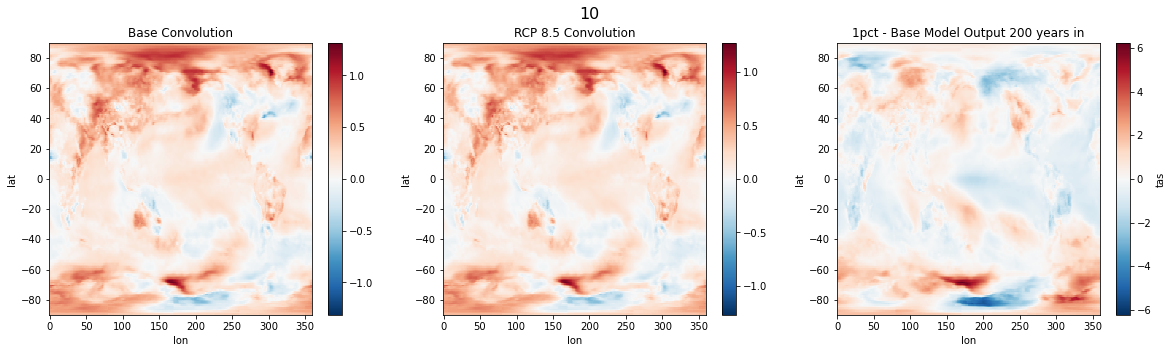

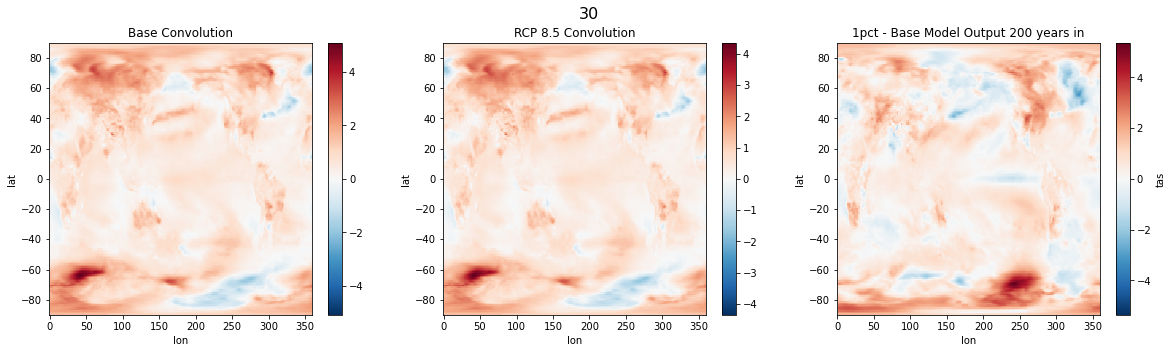

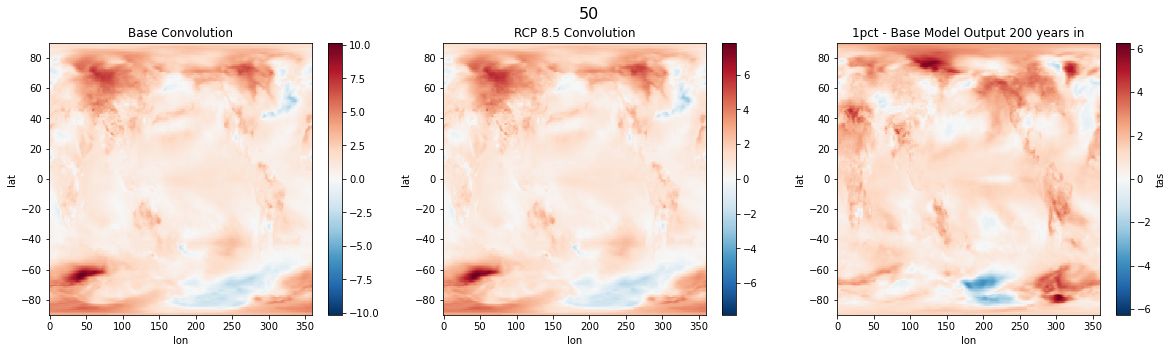

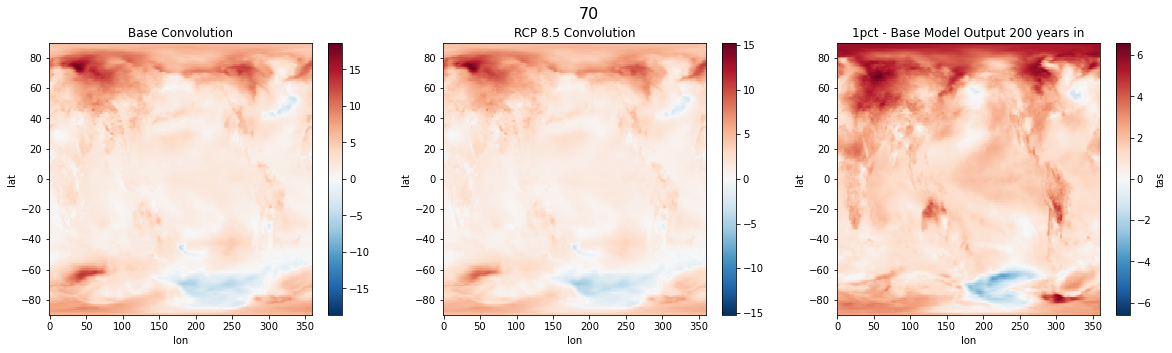

In [123]:
for t in [10,30,50,70]:
    fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize = [20,5])
    conv_1pct['base'].sel(s = t).plot(ax = ax1)
    ax1.set_title('Base Convolution')
    
    conv_1pct['rcp85'].sel(s = t).plot(ax = ax2)
    ax2.set_title('RCP 8.5 Convolution')
    
    ds_dif3['tas'].sel(year = t).plot(ax = ax3)
    ax3.set_title('1pct - Base Model Output 200 years in')
    
    plt.suptitle(f'{t}', fontsize = 16)